In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

/home/gr0k/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [5]:
import confusion_matrix_pretty_print as cmpp

In [6]:
X_train = pd.read_csv('../subset/X_winetrain.csv', index_col=0)
X_test = pd.read_csv('../subset/X_winetest.csv', index_col=0)
y_train = pd.read_csv('../subset/y_winetrain.csv', header=None, index_col=0, squeeze=True)
y_test = pd.read_csv('../subset/y_winetest.csv', header=None, index_col=0, squeeze=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 11)
(5197,)
(1300, 11)
(1300,)


In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
clf = MLPClassifier(hidden_layer_sizes=(11,11), max_iter=200)
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11, 11), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [83]:
%time clf.fit(X_train,y_train)

CPU times: user 2.62 s, sys: 3.85 ms, total: 2.63 s
Wall time: 2.7 s


/home/gr0k/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11, 11), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [84]:
y_pred = clf.predict(X_test)

In [85]:
metrics.accuracy_score(y_test, y_pred)

0.5284615384615384

In [69]:
y_test.value_counts()

1    654
0    399
2    247
Name: 1, dtype: int64

# Null Accuracy

In [70]:
y_test.value_counts().head(1) / y_test.count()

1    0.503077
Name: 1, dtype: float64

# Confusion Matrix

In [86]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[219 167  13]
 [119 324 211]
 [  8  95 144]]


In [87]:
df_cm = pd.DataFrame(cm)

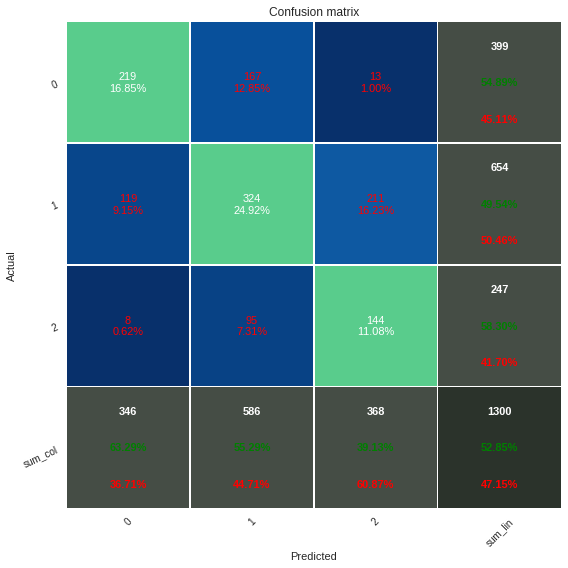

In [88]:
cmpp.pretty_plot_confusion_matrix(df_cm, cmap="Blues_r", show_null_values=1, pred_val_axis='x')

In [89]:
cm.sum(axis=1)

array([399, 654, 247])

In [90]:
np.diag(cm)

array([219, 324, 144])

In [91]:
cm.sum(axis=1) - np.diag(cm)

array([180, 330, 103])

## When Actual = Rows and Predicted = Columns
## TP: Diagonal top left to bottom right
## TN: Values in all columns and rows excluding given Class column and row
## FP: Values in column excluding TP
## FN: Values in row excluding TP

In [92]:
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (TP + FP + FN)

print(TP)
print(FP)
print(FN)
print(TN)

[219 324 144]
[127 262 224]
[180 330 103]
[774 384 829]


## Accuracy: How often correct?  _Diagonal / Total_

In [93]:
print(metrics.accuracy_score(y_test,y_pred))
print(TP.sum() / cm.sum())

0.5284615384615384
0.5284615384615384


## Classification Error: How often incorrect? _Non-Diagonal / Total_

In [94]:
print(1 - metrics.accuracy_score(y_test,y_pred))
print((cm.sum() - np.diag(cm).sum()) / cm.sum())

0.4715384615384616
0.4715384615384615


## Precision: When a positive value is predicted, how often is it correct? _TP / Column Total_

In [95]:
print(metrics.precision_score(y_test,y_pred, average=None))
print(TP / (TP + FP))

[0.63294798 0.55290102 0.39130435]
[0.63294798 0.55290102 0.39130435]


## Sensitivity (Recall or TPR): When actual value is positive, how often is prediction correct? _TP / Row Total_

In [96]:
print(metrics.recall_score(y_test,y_pred, average=None))
print(TP/(TP+FN))

[0.54887218 0.49541284 0.58299595]
[0.54887218 0.49541284 0.58299595]


## False Positive Rate FP / float(TN + FP)
=1 - Specificty

In [97]:
print(FP / (TN + FP))

[0.1409545  0.40557276 0.21272555]


## Specifity TN / float(TN + FP)
When the actual value is negative, how often is the prediction correct?

In [98]:
print(TN / (TN + FP))
print([1,1,1] - (FP / (TN + FP)))

[0.8590455  0.59442724 0.78727445]
[0.8590455  0.59442724 0.78727445]


In [99]:
metrics.matthews_corrcoef(y_test,y_pred)

0.2633946973585404

#### https://www.researchgate.net/post/Multiclass_Confusion_Matrix_Explanation

In [32]:
X_train.shape

(5197, 11)

In [33]:
X = pd.read_csv('../subset/X_wine.csv', index_col=0)
y = pd.read_csv('../subset/y_wine.csv', header=None, index_col=0, squeeze=True)

print(X.shape)
print(y.shape)

(6497, 11)
(6497,)


In [34]:
train_sizes = [50,520,1300,2600,3900,5196]
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [35]:
print(train_scores)
print(validation_scores)

[[1.         0.72       0.72       0.72       0.74      ]
 [0.77692308 0.67115385 0.64615385 0.65576923 0.65      ]
 [0.62461538 0.65615385 0.64461538 0.64230769 0.64692308]
 [0.59461538 0.59846154 0.615      0.60269231 0.58423077]
 [0.60205128 0.58974359 0.57820513 0.54179487 0.56410256]
 [0.58718245 0.59276366 0.56081601 0.56274057 0.59872979]]
[[0.36664105 0.36692308 0.36720554 0.36720554 0.36363636]
 [0.40507302 0.32692308 0.3656659  0.42263279 0.37288136]
 [0.42890085 0.40923077 0.40030793 0.50577367 0.5046225 ]
 [0.41813989 0.42923077 0.48806774 0.55273287 0.4183359 ]
 [0.44888547 0.50384615 0.51732102 0.51886066 0.39599384]
 [0.44196772 0.42307692 0.52117013 0.5904542  0.53466872]]


In [36]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

In [37]:
print(pd.Series(train_scores_mean, index=train_sizes))
print()
print(pd.Series(validation_scores_mean, index=train_sizes))

50      0.780000
520     0.680000
1300    0.642923
2600    0.599000
3900    0.575179
5196    0.580446
dtype: float64

50      0.366322
520     0.378635
1300    0.449767
2600    0.461301
3900    0.476981
5196    0.502268
dtype: float64


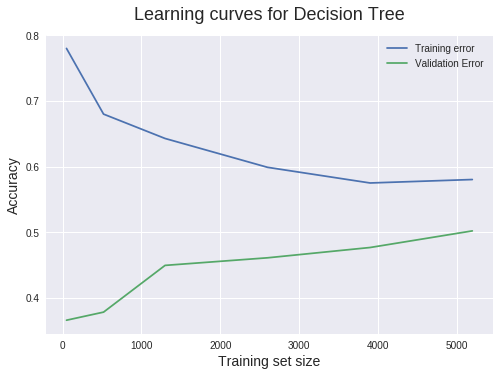

In [38]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [39]:
clf.hidden_layer_sizes = (100,100)
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [40]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

/home/gr0k/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gr0k/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [41]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

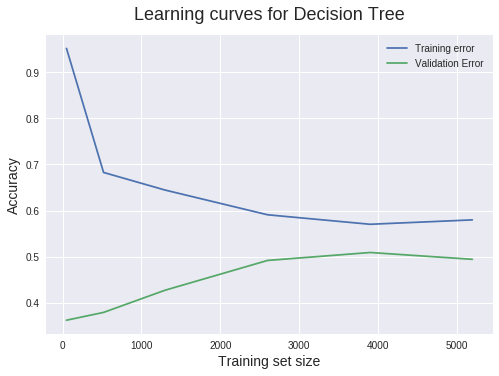

In [42]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [46]:
parameters = {'max_iter' : [100,200,300,400,500,600,700,800]}

In [74]:
clf = MLPClassifier(hidden_layer_sizes=(11,11))

In [75]:
clf_grid = GridSearchCV(clf, parameters, n_jobs=-1)

In [76]:
clf_grid.fit(X_train,y_train)

/home/gr0k/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11, 11), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_iter': [100, 200, 300, 400, 500, 600, 700, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [77]:
clf_grid.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11, 11), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [78]:
grid_results = pd.DataFrame(clf_grid.cv_results_)

In [79]:
print(grid_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.835381      0.060086         0.001059        0.000028   
1       1.665388      0.219940         0.001039        0.000036   
2       2.431774      0.358236         0.001128        0.000117   
3       2.993695      0.520227         0.000993        0.000012   
4       3.434621      0.585374         0.001004        0.000033   
5       4.279492      0.467486         0.000996        0.000052   
6       3.902742      0.582940         0.000991        0.000016   
7       3.585768      0.674200         0.001001        0.000013   

  param_max_iter             params  split0_test_score  split1_test_score  \
0            100  {'max_iter': 100}           0.445790           0.522517   
1            200  {'max_iter': 200}           0.441753           0.540416   
2            300  {'max_iter': 300}           0.456171           0.539261   
3            400  {'max_iter': 400}           0.435986           0.542148   
4          

In [80]:
train_iterations = [100,200,300,400,500,600,700,800]
train_scores_mean = grid_results['mean_train_score']
test_scores_mean = grid_results['mean_test_score']

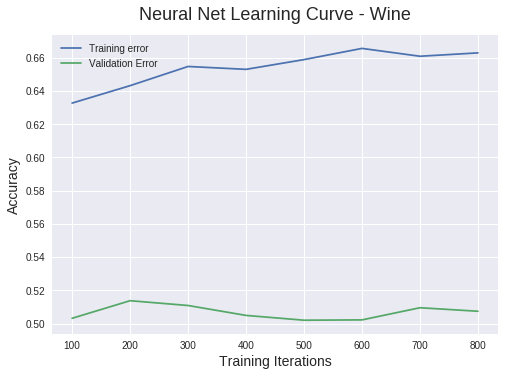

In [81]:
plt.style.use('seaborn')
plt.plot(train_iterations, train_scores_mean, label='Training error')
plt.plot(train_iterations, test_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training Iterations', fontsize = 14)
plt.title('Neural Net Learning Curve - Wine', fontsize = 18, y=1.03)
plt.legend()